In [1]:
import numpy as np
import pandas as pd
import ast
from sentence_transformers import util
import matplotlib.pyplot as plt
from itertools import chain
from sentence_transformers import SentenceTransformer, util
import openai


In [2]:
expunations = pd.read_csv('expunations_complete_with_score_generated_pairs_minilm_openai_embeddings.csv', encoding='utf-8')


In [3]:
expunations

,ID,explanation,keywords,joke,funniness_average,filtered_funniness_average,expression1,expression2,sentence1,sentence2,emb_openai_joke,emb_openai_expression1,emb_openai_expression2,emb_openai_sentence1,emb_openai_sentence2,emb_minilm_joke,emb_minilm_expression1,emb_minilm_expression2,emb_minilm_sentence1,emb_minilm_sentence2
0,hom_657,['the phrase dish it out means to criticizie a...,"[[""waitress's"", 'dish it out'], [''], [''], ['...",She was only a Waitress ' s daughter but she s...,0.6,1.000000,dish it out,dish it out,The waitress had to dish it out to all the cus...,"During the feedback session, she was able to d...","[0.030972516164183617, -0.01517175231128931, -...","[0.014902290888130665, -0.03285151720046997, -...","[0.014902290888130665, -0.03285151720046997, -...","[0.005138686392456293, -0.007233967538923025, ...","[0.010029598139226437, -0.009848949499428272, ...","[-0.03195299953222275, -0.005314176436513662, ...","[0.02359960786998272, 0.10548564046621323, -0....","[0.02359960786998272, 0.10548564046621323, -0....","[-0.03609524294734001, 0.055144697427749634, 0...","[0.0027361176908016205, 0.02424769103527069, -..."
1,het_1635,"['', 'This is a play on words. The words ""pane...","[[''], ['glazier', 'window', 'feel your pane',...",When the glazier was sent to the hospital room...,1.2,2.000000,pane,pain,The glazier carefully installed the new pane i...,The patient experienced severe pain after the ...,"[-0.01962309144437313, 0.04074713587760925, -0...","[0.027517514303326607, -0.026580538600683212, ...","[0.014019208028912544, -0.012372410856187344, ...","[-0.03295952454209328, 0.04716017097234726, -0...","[-0.03114989958703518, 0.02944694459438324, -0...","[-0.07717575877904892, 0.03188902512192726, 0....","[-0.008362654596567154, 0.006861681118607521, ...","[-0.06583624333143234, 0.005977192427963018, 0...","[0.038147103041410446, -0.005319848190993071, ...","[0.011634974740445614, 0.03996971994638443, -0..."
2,hom_1510,"['sandpaper is normally rough on one side ', '...","[['inventor', 'sandpaper', 'rough'], ['invento...",The inventor of sandpaper had a rough time of ...,1.6,1.600000,rough,rough,He had a rough day dealing with the challenges.,The sandpaper is rough and scratches the surface.,"[0.01849677972495556, 0.016096102073788643, 0....","[-0.02635161764919758, 0.004799611866474152, 0...","[-0.02635161764919758, 0.004799611866474152, 0...","[-0.026946933940052986, -0.001050555962137878,...","[0.004222436808049679, 0.02058914303779602, 0....","[-0.028803806751966476, 0.06886464357376099, 0...","[-0.020329659804701805, -0.012983807362616062,...","[-0.020329659804701805, -0.012983807362616062,...","[0.04728022962808609, 0.13506457209587097, 0.0...","[-0.010853069834411144, -0.0011316132731735706..."
3,hom_955,"['', '', '', 'A contortionist is someone who c...","[[''], [''], [''], ['contortionists', 'die', '...","OLD CONTORTIONISTS never die , they just meet ...",0.2,1.000000,meet their end,meet their end,Everyone will meet their end eventually.,The contortionist could effortlessly meet thei...,"[0.05470442399382591, 0.028842754662036896, 0....","[0.046937935054302216, 0.020673619583249092, 0...","[0.046937935054302216, 0.020673619583249092, 0...","[0.02289336919784546, 0.019332490861415863, 0....","[0.04577306658029556, 0.008717942051589489, 0....","[-0.008412803523242474, -0.04027313366532326, ...","[-0.04347410425543785, 0.022733362391591072, 0...","[-0.04347410425543785, 0.022733362391591072, 0...","[-0.022082282230257988, -0.03496827557682991, ...","[-0.05765708535909653, 0.005961173679679632, -..."
4,hom_1505,"['', 'This is a play on words. The word ""party...","[[''], ['whose place to have a party at', 'par...",When you can ' t decide with your friends whos...,0.4,0.666667,party,party,We are hosting a party at our home this Saturday.,The Liberal party announced its new policy age...,"[0.020545732229948044, -0.01821220852434635, 0...","[0.016281891614198685, -0.004896087571978569, ...","[0.01626163721084

# OpenAI embedding vectors

### Symmetry: 
Calculate the cosine similarity between sentence1 and joke, then the cosine similarity between sentence2 and joke and then calculate the difference (and take the absolute value)


In [4]:
diff = expunations.apply(
    lambda row: abs(
        util.cos_sim(ast.literal_eval(row['emb_openai_joke']), ast.literal_eval(row['emb_openai_sentence1'])).item() - 
        util.cos_sim(ast.literal_eval(row['emb_openai_joke']), ast.literal_eval(row['emb_openai_sentence2'])).item()
    ),
    axis=1
)

### Plot against average funniness rating

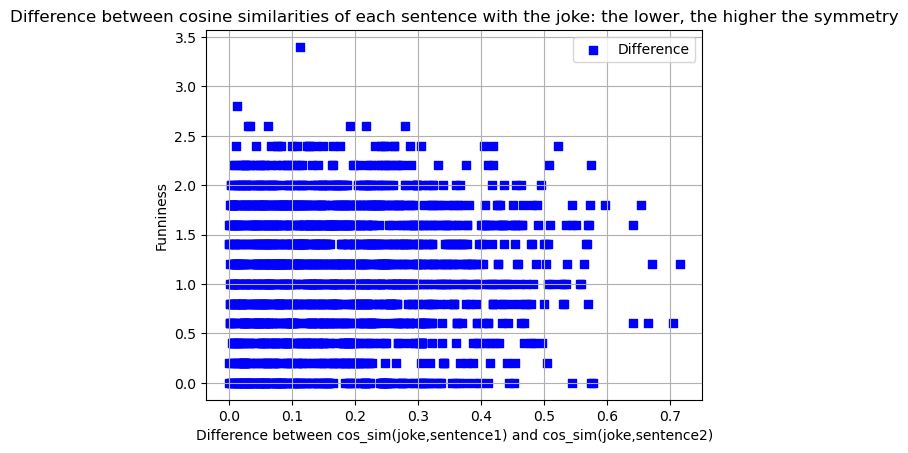

In [5]:
plt.scatter(diff, expunations['funniness_average'], label="Difference", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Funniness")
plt.xlabel("Difference between cos_sim(joke,sentence1) and cos_sim(joke,sentence2)")
plt.title("Difference between cosine similarities of each sentence with the joke: the lower, the higher the symmetry")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Plot against FILTERED average funniness rating

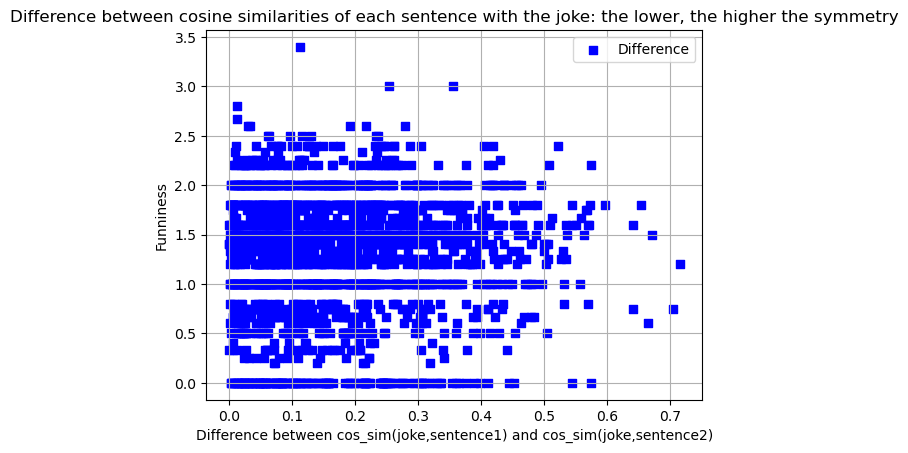

In [6]:
plt.scatter(diff, expunations['filtered_funniness_average'], label="Difference", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Funniness")
plt.xlabel("Difference between cos_sim(joke,sentence1) and cos_sim(joke,sentence2)")
plt.title("Difference between cosine similarities of each sentence with the joke: the lower, the higher the symmetry")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Calculate the cosine similarity of each sentence with the joke separately

In [7]:
cos_sim_joke_sent1 = expunations.apply(
    lambda row: 
        util.cos_sim(ast.literal_eval(row['emb_openai_joke']), ast.literal_eval(row['emb_openai_sentence1'])).item(),
    axis=1
)

In [8]:
cos_sim_joke_sent2 = expunations.apply(
    lambda row: 
        util.cos_sim(ast.literal_eval(row['emb_openai_joke']), ast.literal_eval(row['emb_openai_sentence2'])).item(),
    axis=1
)

### Plot sum against the filtered funniness

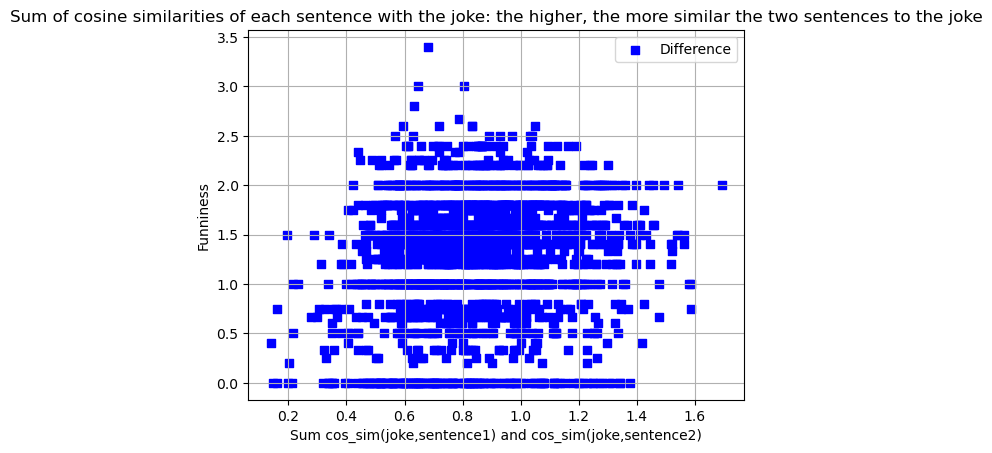

In [9]:
plt.scatter(cos_sim_joke_sent1+cos_sim_joke_sent2, expunations['filtered_funniness_average'], label="Difference", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Funniness")
plt.xlabel("Sum cos_sim(joke,sentence1) and cos_sim(joke,sentence2)")
plt.title("Sum of cosine similarities of each sentence with the joke: the higher, the more similar the two sentences to the joke")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Plot average against the filtered funniness


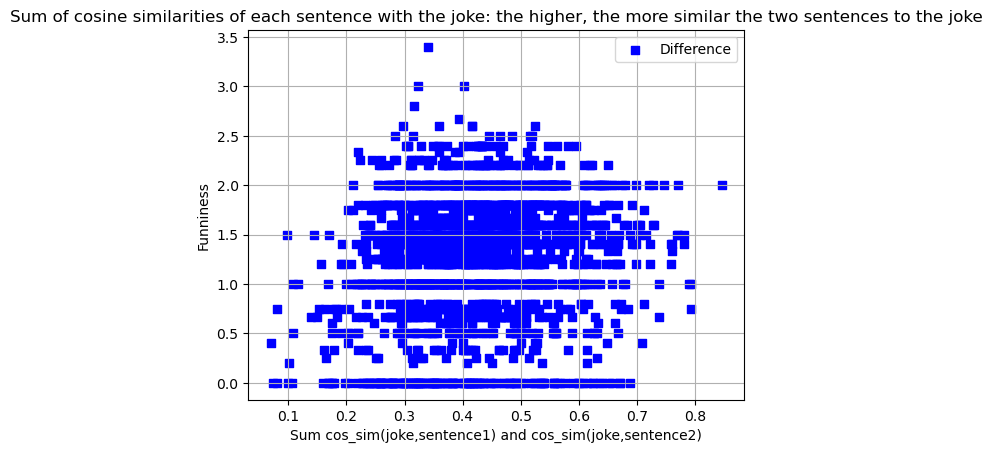

In [10]:
plt.scatter((cos_sim_joke_sent1+cos_sim_joke_sent2)/2, expunations['filtered_funniness_average'], label="Difference", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Funniness")
plt.xlabel("Sum cos_sim(joke,sentence1) and cos_sim(joke,sentence2)")
plt.title("Sum of cosine similarities of each sentence with the joke: the higher, the more similar the two sentences to the joke")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Plot highest against the filtered funniness


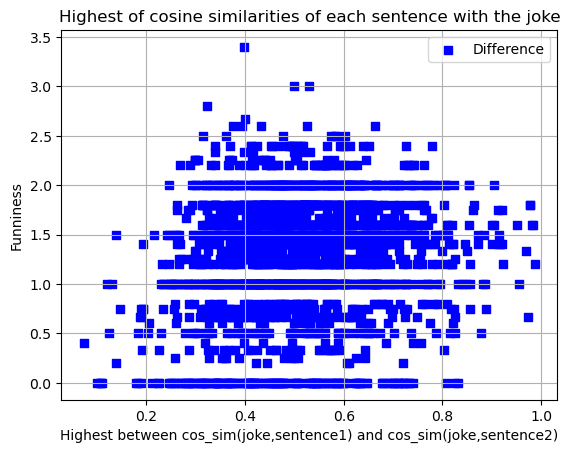

In [11]:
plt.scatter(pd.DataFrame({'cos_sim_joke_sent1': cos_sim_joke_sent1, 'cos_sim_joke_sent2': cos_sim_joke_sent2}).max(axis=1), expunations['filtered_funniness_average'], label="Difference", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Funniness")
plt.xlabel("Highest between cos_sim(joke,sentence1) and cos_sim(joke,sentence2)")
plt.title("Highest of cosine similarities of each sentence with the joke")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Plot lowest against the filtered funniness


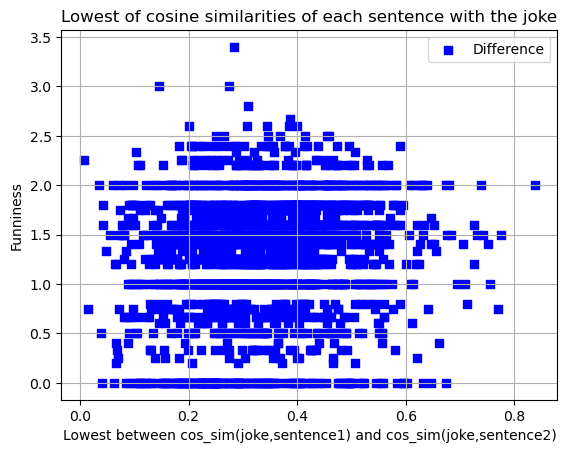

In [12]:
plt.scatter(pd.DataFrame({'cos_sim_joke_sent1': cos_sim_joke_sent1, 'cos_sim_joke_sent2': cos_sim_joke_sent2}).min(axis=1), expunations['filtered_funniness_average'], label="Difference", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Funniness")
plt.xlabel("Lowest between cos_sim(joke,sentence1) and cos_sim(joke,sentence2)")
plt.title("Lowest of cosine similarities of each sentence with the joke")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Plot first against the filtered funniness


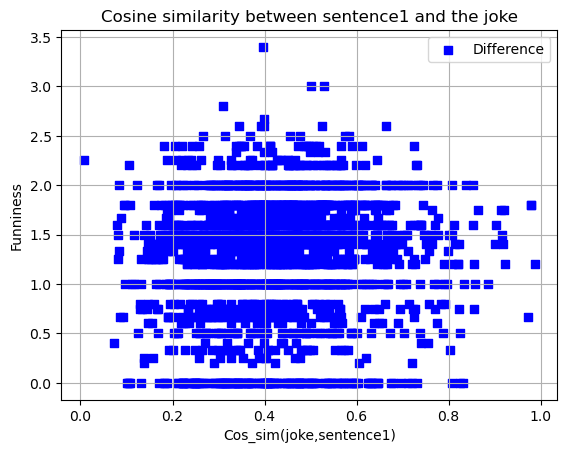

In [13]:
plt.scatter(cos_sim_joke_sent1, expunations['filtered_funniness_average'], label="Difference", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Funniness")
plt.xlabel("Cos_sim(joke,sentence1)")
plt.title("Cosine similarity between sentence1 and the joke")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Plot second against the filtered funniness

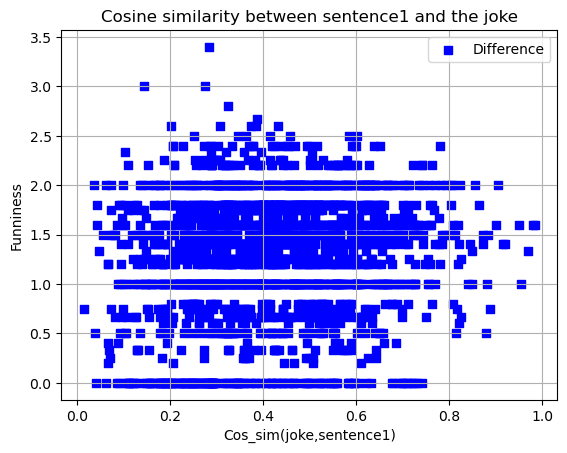

In [14]:
plt.scatter(cos_sim_joke_sent2, expunations['filtered_funniness_average'], label="Difference", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Funniness")
plt.xlabel("Cos_sim(joke,sentence1)")
plt.title("Cosine similarity between sentence1 and the joke")
plt.legend()
plt.grid()

# Show plot
plt.show()


# MiniLM embedding vectors

### Symmetry: 
Calculate the cosine similarity between sentence1 and joke, then the cosine similarity between sentence2 and joke and then calculate the difference (and take the absolute value)


In [15]:
diff = expunations.apply(
    lambda row: abs(
        util.cos_sim(ast.literal_eval(row['emb_minilm_joke']), ast.literal_eval(row['emb_minilm_sentence1'])).item() - 
        util.cos_sim(ast.literal_eval(row['emb_minilm_joke']), ast.literal_eval(row['emb_minilm_sentence2'])).item()
    ),
    axis=1
)

### Plot against average funniness rating

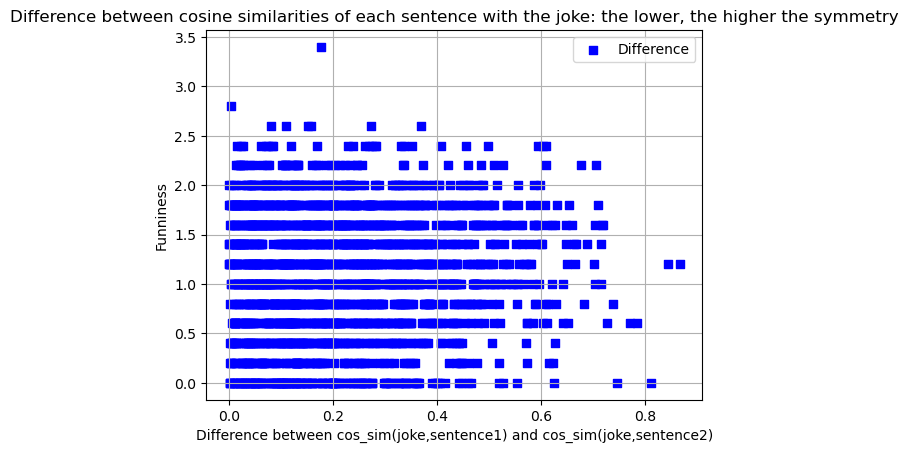

In [16]:
plt.scatter(diff, expunations['funniness_average'], label="Difference", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Funniness")
plt.xlabel("Difference between cos_sim(joke,sentence1) and cos_sim(joke,sentence2)")
plt.title("Difference between cosine similarities of each sentence with the joke: the lower, the higher the symmetry")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Plot against FILTERED average funniness rating

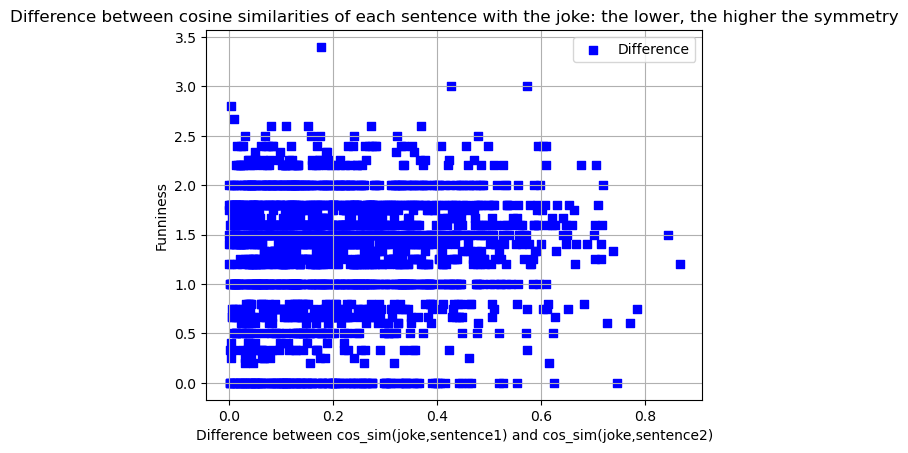

In [17]:
plt.scatter(diff, expunations['filtered_funniness_average'], label="Difference", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Funniness")
plt.xlabel("Difference between cos_sim(joke,sentence1) and cos_sim(joke,sentence2)")
plt.title("Difference between cosine similarities of each sentence with the joke: the lower, the higher the symmetry")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Calculate the cosine similarity of each sentence with the joke separately

In [18]:
cos_sim_joke_sent1 = expunations.apply(
    lambda row: 
        util.cos_sim(ast.literal_eval(row['emb_minilm_joke']), ast.literal_eval(row['emb_minilm_sentence1'])).item(),
    axis=1
)

In [19]:
cos_sim_joke_sent2 = expunations.apply(
    lambda row: 
        util.cos_sim(ast.literal_eval(row['emb_minilm_joke']), ast.literal_eval(row['emb_minilm_sentence2'])).item(),
    axis=1
)

### Plot sum against the filtered funniness

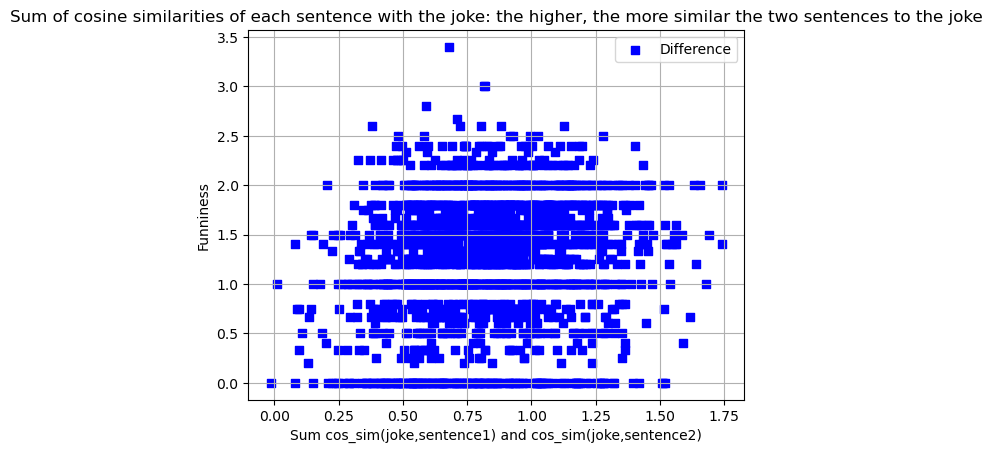

In [20]:
plt.scatter(cos_sim_joke_sent1+cos_sim_joke_sent2, expunations['filtered_funniness_average'], label="Difference", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Funniness")
plt.xlabel("Sum cos_sim(joke,sentence1) and cos_sim(joke,sentence2)")
plt.title("Sum of cosine similarities of each sentence with the joke: the higher, the more similar the two sentences to the joke")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Plot average against the filtered funniness


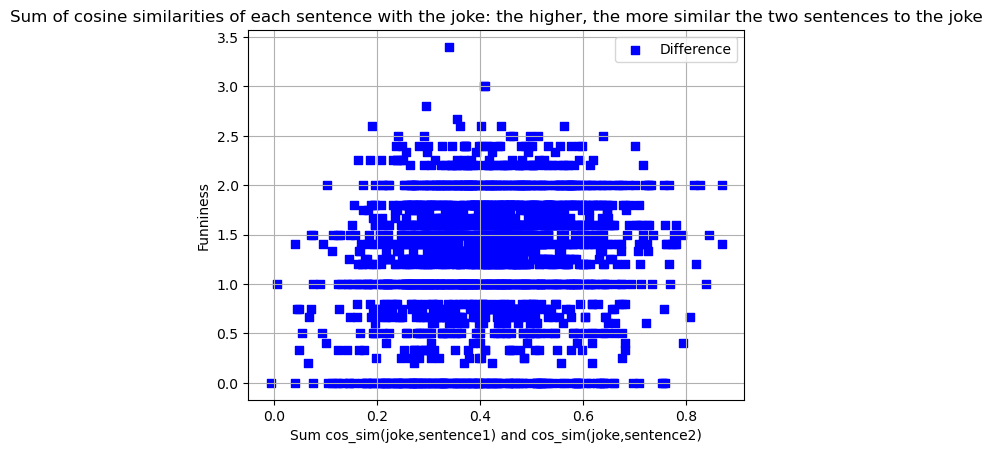

In [21]:
plt.scatter((cos_sim_joke_sent1+cos_sim_joke_sent2)/2, expunations['filtered_funniness_average'], label="Difference", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Funniness")
plt.xlabel("Sum cos_sim(joke,sentence1) and cos_sim(joke,sentence2)")
plt.title("Sum of cosine similarities of each sentence with the joke: the higher, the more similar the two sentences to the joke")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Plot highest against the filtered funniness


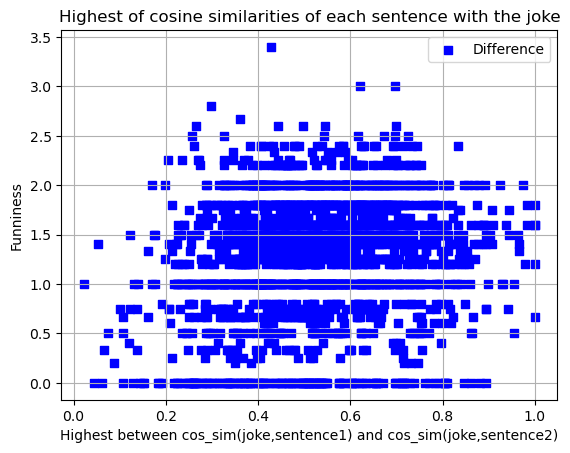

In [22]:
plt.scatter(pd.DataFrame({'cos_sim_joke_sent1': cos_sim_joke_sent1, 'cos_sim_joke_sent2': cos_sim_joke_sent2}).max(axis=1), expunations['filtered_funniness_average'], label="Difference", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Funniness")
plt.xlabel("Highest between cos_sim(joke,sentence1) and cos_sim(joke,sentence2)")
plt.title("Highest of cosine similarities of each sentence with the joke")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Plot lowest against the filtered funniness


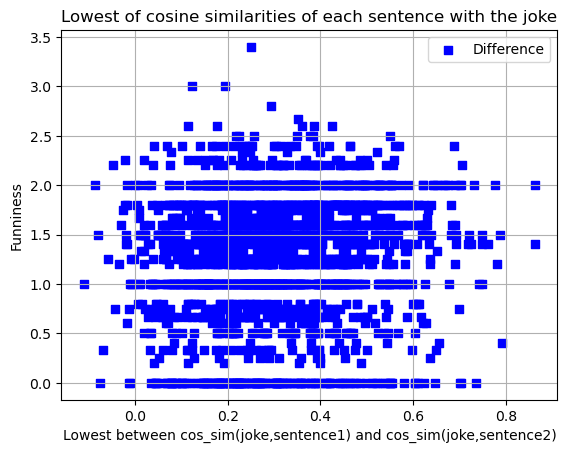

In [23]:
plt.scatter(pd.DataFrame({'cos_sim_joke_sent1': cos_sim_joke_sent1, 'cos_sim_joke_sent2': cos_sim_joke_sent2}).min(axis=1), expunations['filtered_funniness_average'], label="Difference", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Funniness")
plt.xlabel("Lowest between cos_sim(joke,sentence1) and cos_sim(joke,sentence2)")
plt.title("Lowest of cosine similarities of each sentence with the joke")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Plot first against the filtered funniness


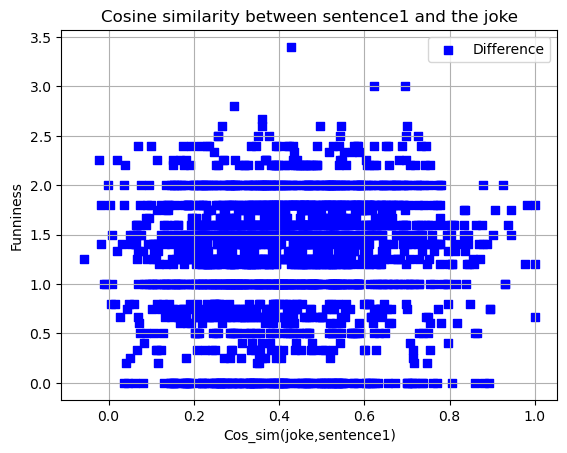

In [24]:
plt.scatter(cos_sim_joke_sent1, expunations['filtered_funniness_average'], label="Difference", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Funniness")
plt.xlabel("Cos_sim(joke,sentence1)")
plt.title("Cosine similarity between sentence1 and the joke")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Plot second against the filtered funniness

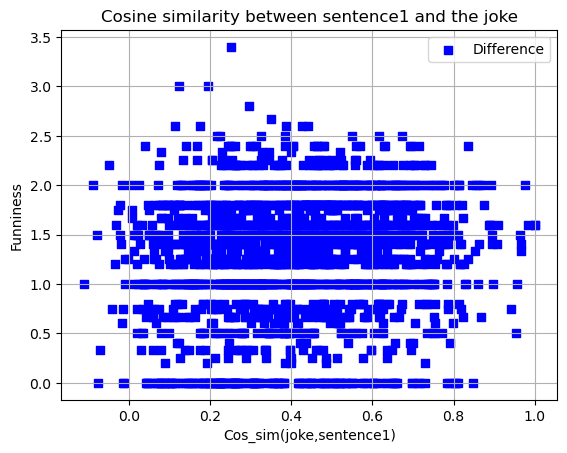

In [25]:
plt.scatter(cos_sim_joke_sent2, expunations['filtered_funniness_average'], label="Difference", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Funniness")
plt.xlabel("Cos_sim(joke,sentence1)")
plt.title("Cosine similarity between sentence1 and the joke")
plt.legend()
plt.grid()

# Show plot
plt.show()
